In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
ds=load_wine()
ds

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
type(ds)

sklearn.utils.Bunch

In [4]:
print(ds.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
X=ds.data
y=ds.target
X.shape, y.shape

((178, 13), (178,))

In [7]:
178 * 0.5

89.0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89, 13), (89, 13), (89,), (89,))

# Feature Selection Method 1: SBS (Sequential Backward Selection)

In [9]:
from sklearn.metrics import accuracy_score

def calc_score(X_train, y_train, X_test, y_test, indices):
    estimator=LogisticRegression()
    estimator.fit(X_train[:, indices], y_train)
    y_pred = estimator.predict(X_test[:, indices])
    score = accuracy_score(y_test, y_pred)
    return score

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
tuple(range(X.shape[1]))

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

In [15]:
from itertools import combinations
count = 0
for p in combinations(tuple(range(X.shape[1])), r=3):
    count += 1
    print(p)
count

(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 1, 10)
(0, 1, 11)
(0, 1, 12)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 2, 11)
(0, 2, 12)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 3, 10)
(0, 3, 11)
(0, 3, 12)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(0, 4, 9)
(0, 4, 10)
(0, 4, 11)
(0, 4, 12)
(0, 5, 6)
(0, 5, 7)
(0, 5, 8)
(0, 5, 9)
(0, 5, 10)
(0, 5, 11)
(0, 5, 12)
(0, 6, 7)
(0, 6, 8)
(0, 6, 9)
(0, 6, 10)
(0, 6, 11)
(0, 6, 12)
(0, 7, 8)
(0, 7, 9)
(0, 7, 10)
(0, 7, 11)
(0, 7, 12)
(0, 8, 9)
(0, 8, 10)
(0, 8, 11)
(0, 8, 12)
(0, 9, 10)
(0, 9, 11)
(0, 9, 12)
(0, 10, 11)
(0, 10, 12)
(0, 11, 12)
(1, 2, 3)
(1, 2, 4)
(1, 2, 5)
(1, 2, 6)
(1, 2, 7)
(1, 2, 8)
(1, 2, 9)
(1, 2, 10)
(1, 2, 11)
(1, 2, 12)
(1, 3, 4)
(1, 3, 5)
(1, 3, 6)
(1, 3, 7)
(1, 3, 8)
(1, 3, 9)
(1, 3, 10)
(1, 3, 11)
(1, 3, 12)
(1, 4, 5)
(1, 4, 6)
(1, 4, 7)
(1, 4, 8)
(1, 4, 9)
(1, 4, 10)
(1, 4, 11)
(1, 4, 12)
(1, 5, 6)
(1, 5, 7)
(1, 5, 8

286

In [18]:
import math
math.factorial(13) / (math.factorial(3) * math.factorial(10))

286.0

In [19]:
from itertools import combinations
import numpy as np

scores = []
subsets = []

dim=3 #X.shape[1]
indices_ = tuple(range(X.shape[1]))
for p in combinations(indices_, r=dim):
    score = calc_score(X_train, y_train, X_test, y_test, p)
    print(p, score)
    scores.append(score)
    subsets.append(p)

(0, 1, 2) 0.7640449438202247
(0, 1, 3) 0.7640449438202247
(0, 1, 4) 0.6179775280898876
(0, 1, 5) 0.8314606741573034
(0, 1, 6) 0.8764044943820225
(0, 1, 7) 0.7640449438202247
(0, 1, 8) 0.797752808988764
(0, 1, 9) 0.8539325842696629
(0, 1, 10) 0.797752808988764
(0, 1, 11) 0.8876404494382022
(0, 1, 12) 0.7191011235955056
(0, 2, 3) 0.7640449438202247
(0, 2, 4) 0.7528089887640449
(0, 2, 5) 0.8764044943820225
(0, 2, 6) 0.9213483146067416
(0, 2, 7) 0.7865168539325843
(0, 2, 8) 0.8089887640449438
(0, 2, 9) 0.8876404494382022
(0, 2, 10) 0.8876404494382022
(0, 2, 11) 0.9101123595505618
(0, 2, 12) 0.7865168539325843
(0, 3, 4) 0.7303370786516854
(0, 3, 5) 0.8539325842696629
(0, 3, 6) 0.9213483146067416
(0, 3, 7) 0.7191011235955056
(0, 3, 8) 0.8089887640449438
(0, 3, 9) 0.8202247191011236
(0, 3, 10) 0.8089887640449438
(0, 3, 11) 0.8764044943820225
(0, 3, 12) 0.7415730337078652
(0, 4, 5) 0.8764044943820225
(0, 4, 6) 0.8764044943820225
(0, 4, 7) 0.7640449438202247
(0, 4, 8) 0.7865168539325843
(0, 4, 

(8, 9, 12) 0.9213483146067416
(8, 10, 11) 0.6966292134831461
(8, 10, 12) 0.8764044943820225
(8, 11, 12) 0.8539325842696629
(9, 10, 11) 0.8876404494382022
(9, 10, 12) 0.8539325842696629
(9, 11, 12) 0.9101123595505618
(10, 11, 12) 0.8651685393258427


In [20]:
#print(np.argmax(scores), np.max(scores))    
best = np.argmax(scores)
indices_ = subsets[best]
print(best, indices_, scores[best])

262 (6, 9, 12) 0.9550561797752809


In [21]:
from itertools import combinations
import numpy as np

best_score_list=[]
for dim in range(1, X.shape[1]+1): #X.shape[1]
    scores = []
    subsets = []
    indices_ = tuple(range(X.shape[1]))
    for p in combinations(indices_, r=dim):
        score = calc_score(X_train, y_train, X_test, y_test, p)
        #print(p, score)
        scores.append(score)
        subsets.append(p)
    #print(np.argmax(scores), np.max(scores))    
    best = np.argmax(scores)
    indices_ = subsets[best]
    print(best, indices_, scores[best])
    best_score_list.append(scores[best])

6 (6,) 0.7528089887640449
59 (6, 9) 0.9101123595505618
262 (6, 9, 12) 0.9550561797752809
75 (0, 2, 5, 9) 0.9550561797752809
181 (0, 2, 3, 6, 8) 0.9550561797752809
386 (0, 2, 3, 6, 8, 11) 0.9662921348314607
59 (0, 1, 2, 3, 6, 9, 11) 0.9662921348314607
68 (0, 1, 2, 3, 5, 6, 10, 11) 0.9662921348314607
81 (0, 1, 2, 3, 5, 6, 8, 9, 11) 0.9662921348314607
66 (0, 1, 2, 3, 5, 6, 8, 9, 10, 11) 0.9662921348314607
53 (0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12) 0.9662921348314607
8 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12) 0.9550561797752809
0 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12) 0.898876404494382


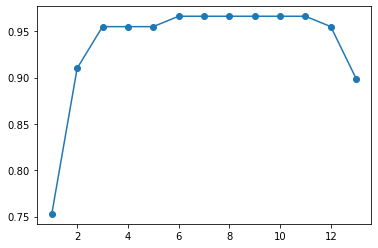

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

No=np.arange(1, len(best_score_list)+1)
plt.plot(No, best_score_list, marker='o', markersize=6)

In [23]:
ds.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [24]:
np.array(ds.feature_names)

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype='<U28')

In [26]:
np.array(ds.feature_names)[0]

'alcohol'

In [27]:
np.array(ds.feature_names)[[0]]

array(['alcohol'], dtype='<U28')

In [28]:
np.array(ds.feature_names)[[0, 1, 2, 3, 6, 10]]

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'flavanoids',
       'hue'], dtype='<U28')

# Feature Selection Method 2: Random Forest

In [29]:
import numpy as np
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the above line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [30]:
from sklearn.ensemble import RandomForestClassifier

X = df_wine.iloc[:, 1:]
y = df_wine.iloc[:, 0:1]
print(y)

forest = RandomForestClassifier(n_estimators=10, random_state=1)
# forest = RandomForestClassifier(n_estimators=10)

forest.fit(X, y)
importances = forest.feature_importances_
importances

     Class label
0              1
1              1
2              1
3              1
4              1
..           ...
173            3
174            3
175            3
176            3
177            3

[178 rows x 1 columns]


array([0.10124609, 0.01335551, 0.01811821, 0.01238926, 0.02993856,
       0.04624171, 0.08011699, 0.03004005, 0.01676122, 0.186774  ,
       0.04463859, 0.18973676, 0.23064305])

In [41]:
importances.shape

(13,)

In [31]:
indices = np.argsort(importances)[::-1]
indices

array([12, 11,  9,  0,  6,  5, 10,  7,  4,  2,  8,  1,  3], dtype=int64)

In [32]:
df = pd.DataFrame({'no':indices, 'importances': np.sort(importances)[::-1]})
df

,no,importances
0,12,0.230643
1,11,0.189737
2,9,0.186774
3,0,0.101246
4,6,0.080117
5,5,0.046242
6,10,0.044639
7,7,0.030040
8,4,0.029939
9,2,0.018118


In [33]:
importances[indices]

array([0.23064305, 0.18973676, 0.186774  , 0.10124609, 0.08011699,
       0.04624171, 0.04463859, 0.03004005, 0.02993856, 0.01811821,
       0.01676122, 0.01335551, 0.01238926])

In [34]:
df = pd.DataFrame({'no':indices, 'importances': importances[indices]})
df

,no,importances
0,12,0.230643
1,11,0.189737
2,9,0.186774
3,0,0.101246
4,6,0.080117
5,5,0.046242
6,10,0.044639
7,7,0.030040
8,4,0.029939
9,2,0.018118


([<matplotlib.axis.XTick at 0x2ccd66ee250>,
 [Text(0, 0, '12'),
  Text(0, 0, '11'),
  Text(0, 0, '9'),
  Text(0, 0, '0'),
  Text(0, 0, '6'),
  Text(0, 0, '5'),
  Text(0, 0, '10'),
  Text(0, 0, '7'),
  Text(0, 0, '4'),
  Text(0, 0, '2'),
  Text(0, 0, '8'),
  Text(0, 0, '1'),
  Text(0, 0, '3')])

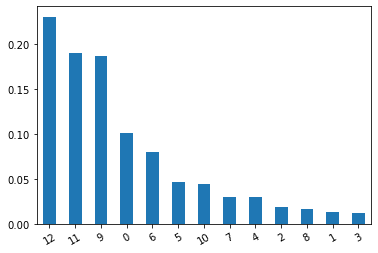

In [36]:
df['importances'].plot(kind='bar')
plt.xticks(np.arange(len(indices)), indices, rotation=30)

In [37]:
plt.xticks?

In [40]:
df_wine.columns

Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [43]:
len(df_wine.columns)

14

In [44]:
df_wine.columns[1:]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [46]:
np.array(df_wine.columns[1:]).shape

(13,)

([<matplotlib.axis.XTick at 0x2ccd750b5e0>,
 [Text(0, 0, 'Proline'),
  Text(0, 0, 'OD280/OD315 of diluted wines'),
  Text(0, 0, 'Color intensity'),
  Text(0, 0, 'Alcohol'),
  Text(0, 0, 'Flavanoids'),
  Text(0, 0, 'Total phenols'),
  Text(0, 0, 'Hue'),
  Text(0, 0, 'Nonflavanoid phenols'),
  Text(0, 0, 'Magnesium'),
  Text(0, 0, 'Ash'),
  Text(0, 0, 'Proanthocyanins'),
  Text(0, 0, 'Malic acid'),
  Text(0, 0, 'Alcalinity of ash')])

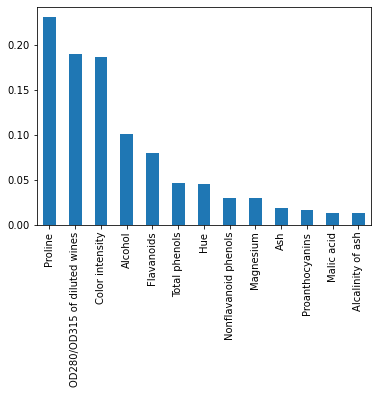

In [47]:
df['importances'].plot(kind='bar')
plt.xticks(np.arange(len(indices)), np.array(df_wine.columns[1:])[[indices]], rotation=90)

# Feature Extraction Method 1: PCA

In [48]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the above line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [49]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[ 0.71225893,  2.22048673, -0.13025864, ..., -0.20017028,
        -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, ...,  1.33982592,
         0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605, ...,  1.06806189,
         0.1308109 ,  1.62934866],
       ...,
       [ 1.02803489,  2.29746195, -0.5778911 , ..., -1.69487249,
        -1.86068037, -1.04434751],
       [-1.30384913, -1.08089484, -0.31677217, ...,  0.16218176,
         0.73691694,  0.40313628],
       [-0.40510216,  1.29678411,  0.05625489, ...,  1.06806189,
         0.73691694, -0.89683324]])

In [51]:
import numpy as np
np.cov?
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [120]:
cov_mat

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

In [57]:
cov_mat.shape

(13, 13)

In [52]:
np.cumsum?

In [53]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639, 0.89964293, 0.92608211, 0.9499753 , 0.96627144,
       0.98007165, 0.99179391, 1.        ])

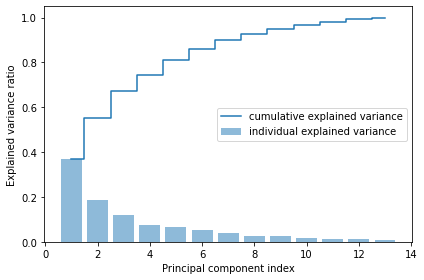

In [54]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance') # 柏拉圖（Pareto Chart）
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

In [55]:
eigen_vecs.shape

(13, 13)

In [59]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(4.842745315655895,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352255,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.548458248820353,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977358,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578439,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114, 

In [60]:
np.hstack?

In [62]:
eigen_pairs[0]

(4.842745315655895,
 array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
        -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
        -0.32613263, -0.36861022, -0.29669651]))

In [63]:
eigen_pairs[0][1]

array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651])

In [61]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [69]:
X_train_std.shape

(124, 13)

In [66]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [67]:
# 轉換的權重，矩陣相乘 (n, 13) x (13, 2) = (n, 2)
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [68]:
X_train_std.dot(w)

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

In [70]:
X_train_std.dot(w).shape

(124, 2)

In [71]:
np.unique(y_train)

array([1, 2, 3], dtype=int64)

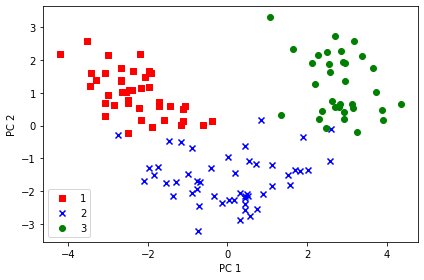

In [72]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

# SKLearn

In [73]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

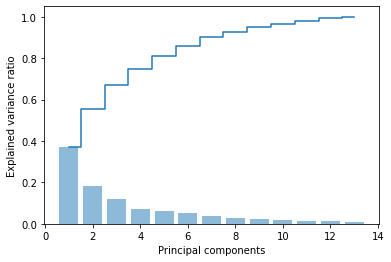

In [74]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

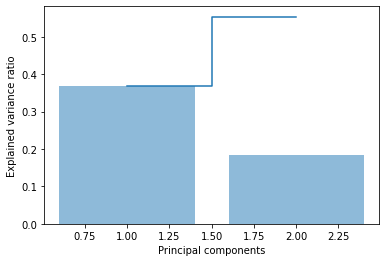

In [78]:
plt.bar(range(1, 3), pca.explained_variance_ratio_[:2], alpha=0.5, align='center')
plt.step(range(1, 3), np.cumsum(pca.explained_variance_ratio_[:2]), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [79]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_train_pca.shape

(124, 2)

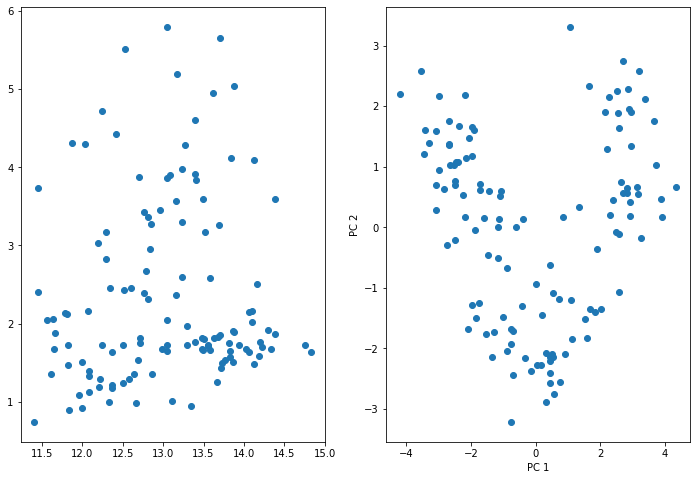

In [80]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1])

plt.subplot(122)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

In [83]:
np.arange(1, 10, 1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
xx1 = np.array([[1, 2], 
                [3, 4]])
xx2 = np.array([[5, 6], 
                [7, 8]])
np.array([xx1.ravel(), xx2.ravel()]).T

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [86]:
from matplotlib.colors import ListedColormap
ListedColormap?
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [87]:
X_train_std.shape

(124, 13)

In [88]:
y_train

array([3, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 1,
       2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 2, 2, 3, 1, 2, 1, 2, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 1, 1, 2, 2, 3, 1, 3, 1, 2, 2,
       2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2], dtype=int64)

In [89]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


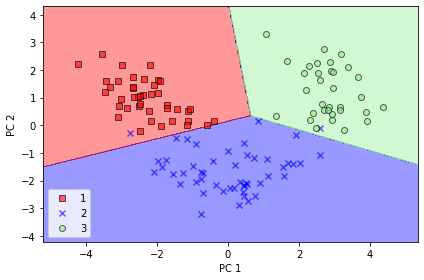

In [90]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


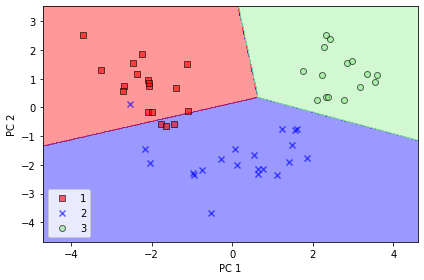

In [91]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [92]:
pca = PCA(0.8)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108])

In [93]:
X_train_pca.shape

(124, 5)

# Feature Extraction Method 2: LDA (Linear Discriminant Analysis) via scikit-learn

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA?
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_train_lda

array([[ 2.96463525e+00,  1.15696578e+00],
       [-3.35009835e+00,  2.07089788e+00],
       [-3.06163017e+00,  1.09368358e+00],
       [-2.73298160e+00,  1.49363859e+00],
       [ 3.54607454e+00,  9.92205527e-01],
       [-1.65265822e-02, -2.95671405e+00],
       [ 2.65217532e-01, -3.71080577e+00],
       [ 3.35455379e+00,  1.41853278e-01],
       [ 8.27887672e-01, -1.91824846e+00],
       [ 1.47271886e+00, -3.92230732e+00],
       [ 5.55260633e-01, -1.77931039e+00],
       [-4.41646387e+00,  2.29291397e+00],
       [ 1.89893873e+00, -7.66042417e-01],
       [ 5.49795276e+00,  1.46407663e+00],
       [-2.00548346e+00,  9.01662907e-01],
       [ 4.66436578e+00,  2.64522287e+00],
       [-1.13237281e-01, -5.06124163e+00],
       [-3.19851190e+00,  3.82628514e-01],
       [ 4.08602659e+00,  3.54626880e+00],
       [ 3.44812085e+00,  1.16866440e+00],
       [ 6.84407007e-01, -3.69783272e+00],
       [-3.34974226e+00,  2.11208901e+00],
       [-1.83687080e+00, -2.28371487e+00],
       [ 6.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


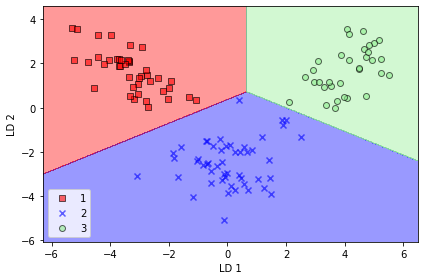

In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


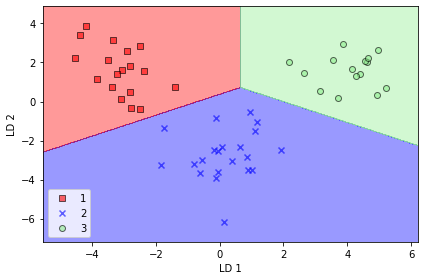

In [96]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()

# Feature Extraction Method 3: Kernel PCA (Kernel Principal Component Analysis )

(100, 2)


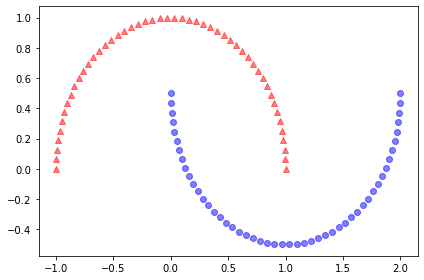

In [97]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)
print(X.shape)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()

In [100]:
np.zeros((50, 1)).shape

(50, 1)

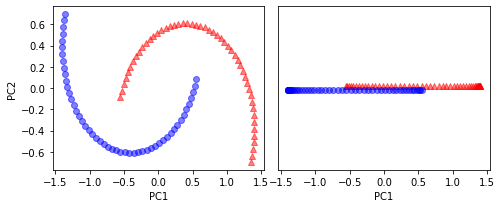

In [101]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()

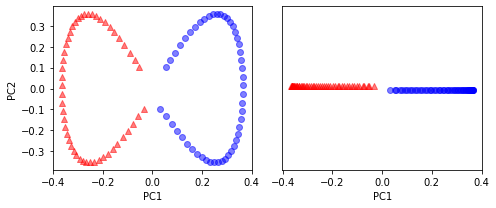

In [102]:
from sklearn.decomposition import KernelPCA
clf = KernelPCA(kernel='rbf', n_components=2, gamma=15)
X_kpca2 = clf.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca2[y==0, 0], X_kpca2[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca2[y==1, 0], X_kpca2[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca2[y==0, 0], np.zeros((50, 1)) + 0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca2[y==1, 0], np.zeros((50, 1)) - 0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_14.png', dpi=300)
plt.show()

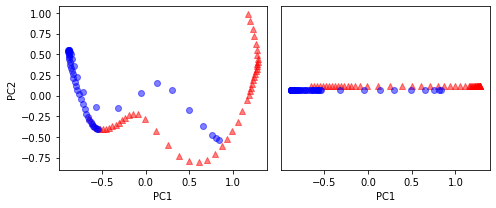

In [103]:
from sklearn.decomposition import KernelPCA
clf = KernelPCA(kernel='sigmoid', n_components=2, gamma=15)
X_kpca2 = clf.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca2[y==0, 0], X_kpca2[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca2[y==1, 0], X_kpca2[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca2[y==0, 0], np.zeros((50, 1)) + 0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca2[y==1, 0], np.zeros((50, 1)) - 0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_14.png', dpi=300)
plt.show()

## Example 2: Separating concentric circles

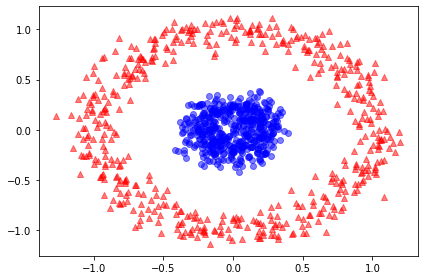

In [104]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_15.png', dpi=300)
plt.show()

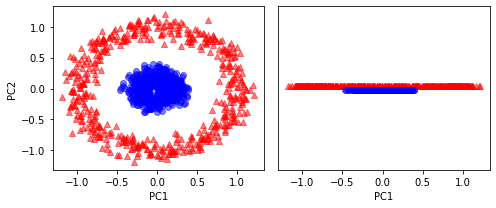

In [112]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

# ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, )) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_16.png', dpi=300)
plt.show()

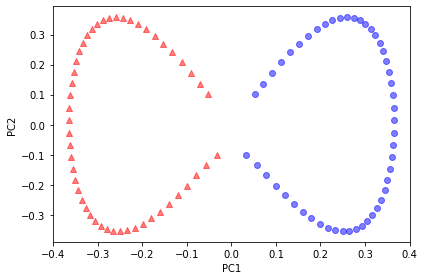

In [113]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('images/05_19.png', dpi=300)
plt.show()

# GridSearchCV

In [117]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
# clf = GridSearchCV(svc, parameters, n_jobs=1)
clf = GridSearchCV(svc, parameters, n_jobs=-1) # All CPU
clf.fit(iris.data, iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [118]:
clf.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [119]:
clf.best_score_

0.9800000000000001